## Setting Up

You can install the libraries using pip or conda. 

**N.B.** you may have to restart the kernel after installing these packages for your first run.

In [106]:
#!/bin/env python

# install packages
!pip3 install --user pandas
!pip3 install --user numpy
!pip3 install --user matplotlib
!pip3 install --user plotly
!pip3 install --user jupyter-dash
print("finished")

Having installed the libraries, you can import them as follows.

In [107]:
# import libraries
%matplotlib inline

#import plotly
import requests
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State

# Set display row/column to show all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [108]:
# url = 'https://dbgee-mar22-12.ew.r.appspot.com/api/text'
url = 'https://dbgee-mar22-12.ew.r.appspot.com/api/analyze'

article3 = []  
# https://www.delftstack.com/howto/python/python-readlines-without-newline/
with open("articles/article3.txt", "r") as file:
    article3=file.read().splitlines() # splitlines method splits lines into list without new line
while("" in article3) :
    article3.remove("") # remove empty strings from list of strings 'article2'

art3_post = []

for i in range(len(article3)):
    print(i)
    myobj = {'text': article3[i]}
    x = requests.post(url,  data = myobj)
    art3_post.append(x.json())
    
print("finished")

0
1
2
3
4
5
6
7
8
9
10
11
-


In [109]:
art3_post[0]

{'5712466340216832': {'text': 'Deutsche Bank Partners with Oracle to Accelerate Technology Modernization',
  'timestamp': '2022-03-25 12:35:08.766662',
  'sentiment': 'neutral',
  'entities': [{'name': 'Deutsche Bank Partners',
    'entitytype': 'ORGANIZATION',
    'score': 0.10000000149011612,
    'sentiment': 'positive'},
   {'name': 'Oracle',
    'entitytype': 'ORGANIZATION',
    'score': 0.10000000149011612,
    'sentiment': 'positive'},
   {'name': 'Accelerate Technology Modernization',
    'entitytype': 'OTHER',
    'score': 0.10000000149011612,
    'sentiment': 'positive'}],
  'entities_esg': [],
  'syntax_esg': []}}

## Data Visualisation

Plotly is a commonly-used data visualisation library. The following examples will show you how to create different graphs from the sample data.

We can first read the sample data into a dataframe. The sample data is taken from the UK Met Office and shows the maximum and minimum temperature, the rainfall and the number of hours of sunlight for each month in 2018.

In [110]:
## question 2) Named Entity Extraction ##
entity_name=[]
entity_type = []
entity_score = []

    #entity_dict.append([dict(zip(dict_keys,i)) for i in result])
    # entity_name.append(i["name"] for i in result)
entity_lst = []
syntax_esg = []
    
for result in art3_post:
    for key in result.keys():
        entity_lst.append(result.get(key).get('entities'))
        syntax_esg.append(result.get(key).get('syntax_esg'))
    
# print(len(art3_post))
# print(entity_lst)
# print(entity_esg)

# [i for i in entity_lst]

# reduce to 1 a list of lists, flattening :
entity_lst_flat = [item for sublist in entity_lst for item in sublist]


In [111]:
for i in range(0,len(entity_lst_flat)-1):
    entity_name.append(i["name"] for i in entity_lst_flat)

In [112]:
# reduce to 1 a list of lists:
entity_name_flat = [item for sublist in entity_name for item in sublist]
entity_type_flat = [item for sublist in entity_type for item in sublist]
entity_score_flat = [item for sublist in entity_score for item in sublist]

In [113]:
entity_df = pd.DataFrame(list(zip(entity_name_flat, entity_type_flat, entity_score_flat)),  columns = ["entity","type","score"])

In [114]:
# number of duplicates for each entry, reducing df to unique df:
entity_df_count = entity_df.groupby(entity_df.columns.tolist(),as_index=False).size()

In [115]:
# sort values by score
most_scored = entity_df_count.sort_values(by=['score'],  ascending=False)
# sort values by # repetitions
# entity_df_count.sort_values(by=['size'],  ascending=False)
# no many duplicates

In [116]:
# getting only the entities:
entity_name_df = pd.DataFrame(list(zip(entity_name_flat)), columns=["entity"])
# descending order by number of repetitions:
entity_name_df_sorted = entity_name_df.groupby(entity_name_df.columns.tolist(),as_index=False).size().sort_values(by=['size'],  ascending=False)
entity_name_df_sorted.rename(columns = {'entity':'Entity', 'size':'Frequency'}, inplace = True)

In [117]:
# entity name sorted greater than 1 = more than 1 appearance/repetition
ens_gt1 = entity_name_df_sorted[entity_name_df_sorted['Frequency']>1]
#ens_gt2 = entity_name_df_sorted2[entity_name_df_sorted2['Frequency']>1]

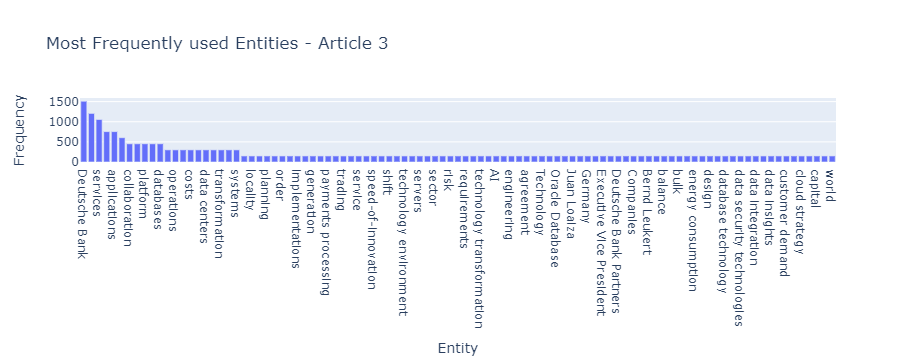

In [120]:
# Named entity extraction – table of most important/frequently used entities referenced.
px.bar(ens_gt1, x='Entity', y='Frequency', title= "Most Frequently used Entities - Article 3").show()

In [121]:
syntax_esg[1]

[{'name': 'data', 'entitytype': 'NOUN'}]

In [122]:
syntax_cnt = {}
for syntax in syntax_esg:
    if(len(syntax)>0):
        nm = syntax[0]['name']
        if(not nm in syntax_cnt.keys()):
           syntax_cnt[nm]=0
        syntax_cnt[nm] = syntax_cnt[nm] +1


In [123]:
pdESG = pd.DataFrame.from_dict(syntax_cnt.items())
pdESG = pdESG.sort_values(by=[1],ascending=False)

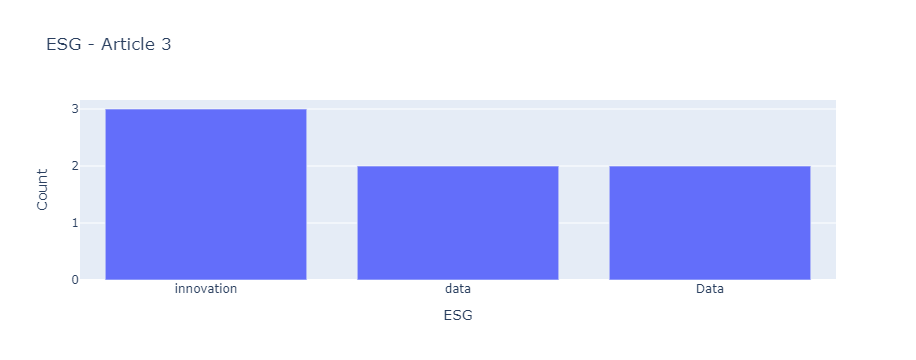

In [124]:
ax1=px.bar(pdESG, x=0, y=1, title= "ESG - Article 3")
ax1.update_layout(
    xaxis_title="ESG",
    yaxis_title="Count")
ax1.show()